# HRF RM 2.5

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

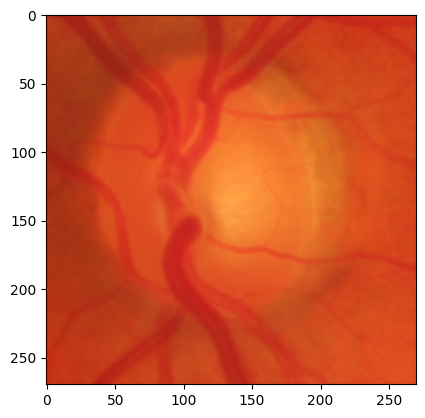

In [23]:
plt.imshow(roi)

In [24]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [25]:
green = roi[:,:,1].copy()

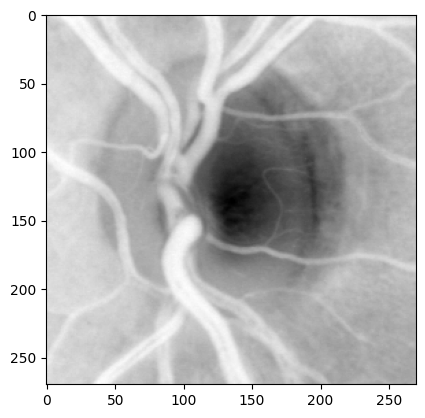

In [26]:
green_inv = 255-green.copy()
plt.imshow(green_inv, 'gray')

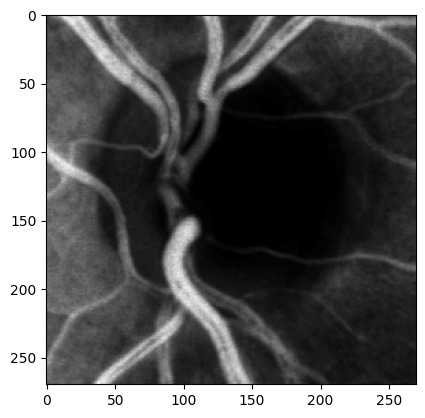

In [83]:
gmc = adjust_gamma(green_inv.copy(), 10)
plt.imshow(gmc, 'gray')

In [97]:
ret, th = cv2.threshold(gmc.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

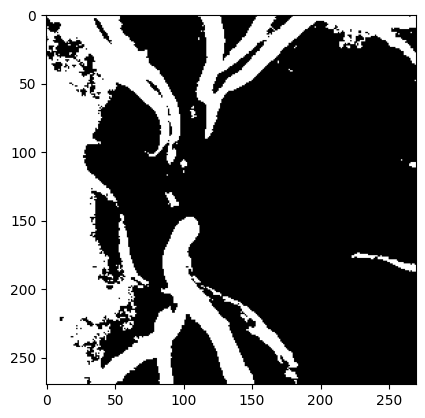

In [98]:
plt.imshow(th, 'gray')

In [116]:
dst = cv2.inpaint(roi.copy(), th, 20,cv2.INPAINT_TELEA)

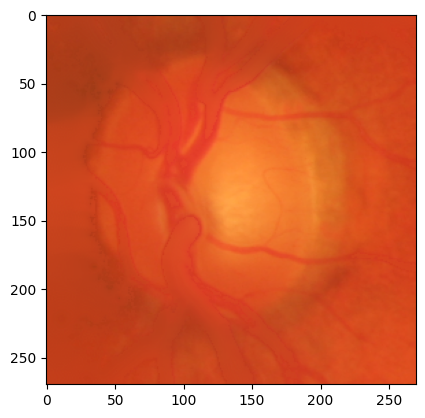

In [117]:
plt.imshow(dst)

In [120]:
dstr = dst[:,:,0].copy()

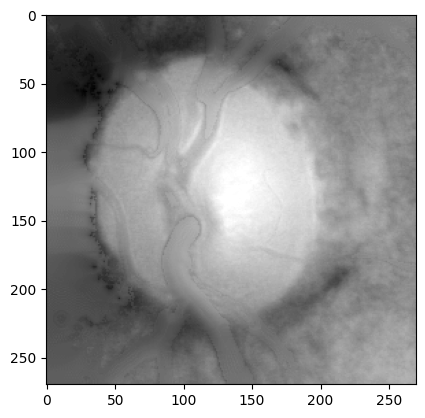

In [121]:
plt.imshow(dstr, 'gray')

In [136]:
dstr_inv = 255-dstr.copy()

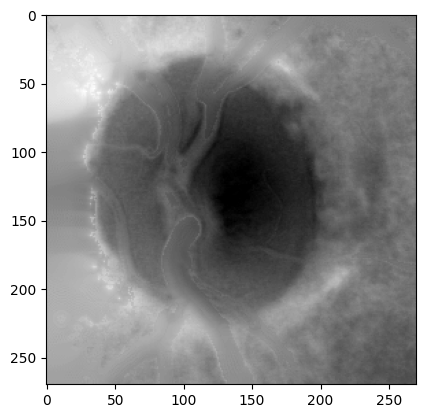

In [138]:
plt.imshow(dstr_inv, 'gray')

In [156]:
dilation = cv2.dilate(dstr_inv.copy(), kernel=np.ones((10,10), np.uint8))

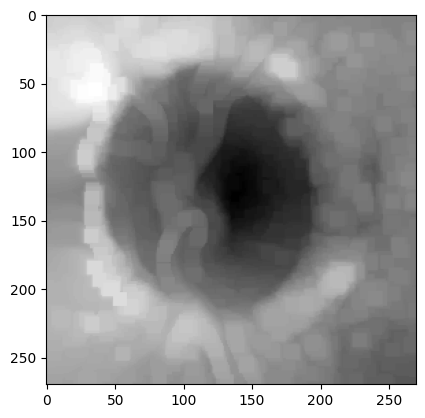

In [158]:
plt.imshow(dilation, 'gray')

In [159]:
erosion = cv2.erode(dstr_inv.copy(), kernel=np.ones((10,10), np.uint8))

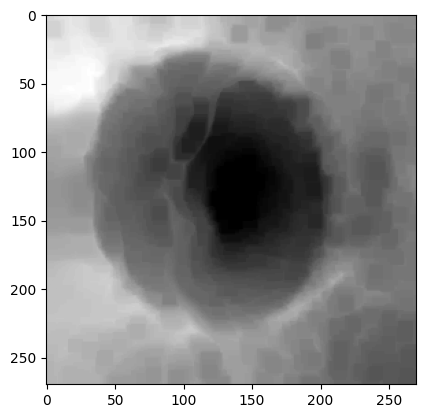

In [160]:
plt.imshow(erosion, 'gray')

In [178]:
blur = cv2.blur(erosion, (9,9))

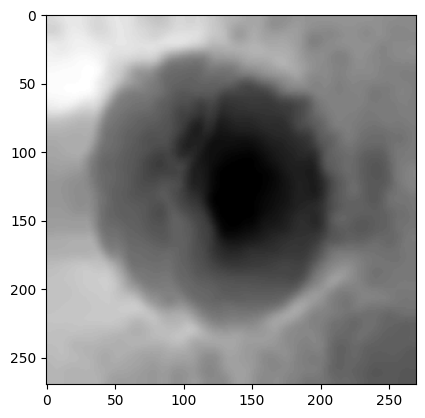

In [179]:
plt.imshow(blur, 'gray')

In [180]:
blur_ori = 255-blur.copy()

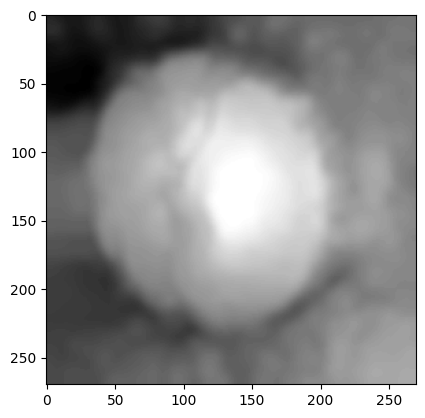

In [181]:
plt.imshow(blur_ori, 'gray')

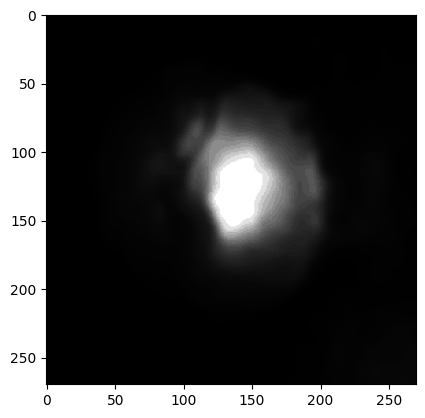

In [201]:
blr_gm = adjust_gamma(blur_ori, gamma=30)
plt.imshow(blr_gm, 'gray')

In [202]:
ret2, th2 = cv2.threshold(blr_gm.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

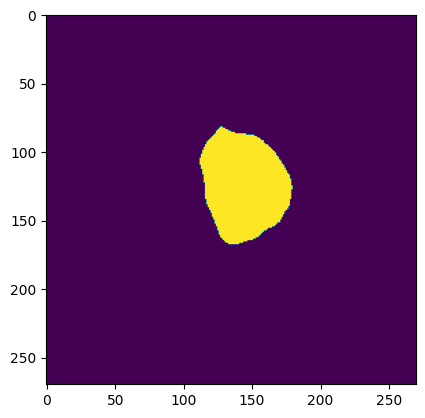

In [203]:
plt.imshow(th2)

In [204]:
cont, hcy = cv2.findContours(th2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

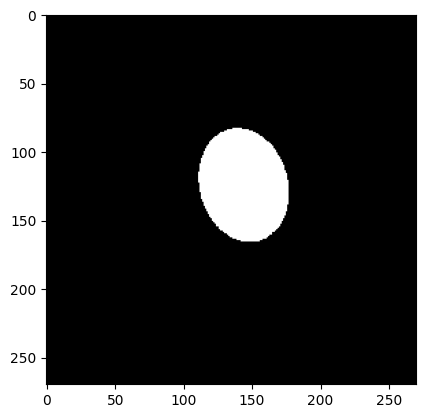

In [205]:
roic = roi.copy()
thhh = th2.copy()
if len(cont) > 1:
    conts = np.array([c.shape[0] for c in cont])
    cont_idx = np.argmax(conts)
    ellipse = cv2.fitEllipse(cont[cont_idx])
else:
    ellipse = cv2.fitEllipse(cont[0])
    
od = np.zeros_like(thhh, dtype='uint8')
cv2.ellipse(od, ellipse, (255, 255, 255), -1)
cv2.ellipse(roic, ellipse, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(od, 'gray')  

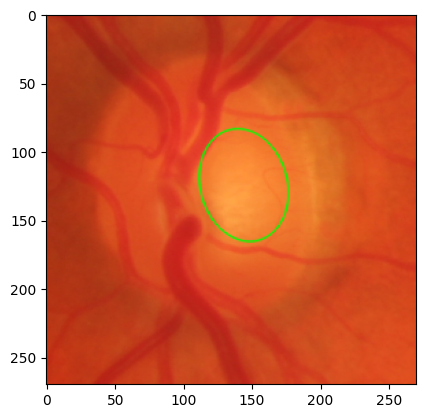

In [206]:
plt.imshow(roic)